# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

OBSERVATIONS

1) Acquired data at increased positive latitudes is mostly symmetrical to acquired data at increased negative latitudes, as they are equidistant from the equator.

2) While wind speeds are clustered from 0 to 15mph, even within this cluster there does not seem to be any relationship with the shifting of the latitude in either direction.

3) Out of the four categories of data studied (Temp, Humidity, Cloudiness, Wind), this exercise only finds a clear influence of latitude on temperature, while the other categories appear to shift independent of this specific measurement.


In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination, add to list
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
 
    if city not in cities:
        cities.append(city)

# Print the city count
len(cities)

596

In [19]:
# Import API key
weather_api_key = "58b5948a2f6b2f6aa61991b55f54a66a"

#Set url for series of calls
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
#Create lists for new data frame
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set up city loop
record = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")

 
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
         
        record= record + 1
        
# If record not found, skip
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=hambantota
Processing Record 2 | Cáchira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=cachira
Processing Record 3 | Clyde River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=clyde river
City not found. Skipping...
Processing Record 4 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=rocha
Processing Record 5 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=longyearbyen
Processing Record 6 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=albany
Processing Record 7 | Ponta do Sol
http://api.openw

Processing Record 56 | Itoman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=itoman
Processing Record 57 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=mount isa
Processing Record 58 | Baykit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=baykit
Processing Record 59 | Chui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=chuy
Processing Record 60 | San Ramon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=san ramon
Processing Record 61 | Leopold
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=leopold
Processing Record 62 | Naryan-Mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=naryan-mar
Pr

Processing Record 113 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=mar del plata
Processing Record 114 | Muli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=muli
Processing Record 115 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=norman wells
Processing Record 116 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=faanui
Processing Record 117 | Sumbe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=sumbe
Processing Record 118 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=bredasdorp
Processing Record 119 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b

Processing Record 168 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=saint-philippe
Processing Record 169 | Marsabit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=marsabit
Processing Record 170 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=cabo san lucas
Processing Record 171 | Carman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=carman
City not found. Skipping...
Processing Record 172 | Kichera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=kichera
Processing Record 173 | Seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=seoul
Processing Record 174 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 224 | Porto-Novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=porto novo
Processing Record 225 | Turukhansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=turukhansk
Processing Record 226 | Golden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=golden
City not found. Skipping...
Processing Record 227 | Bafatá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=bafata
City not found. Skipping...
Processing Record 228 | Krasnyy Kut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=krasnyy kut
Processing Record 229 | Nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=nuuk
Processing Record 230 | Challans
http://api.openweathermap.org/data/2.5/weat

Processing Record 279 | Qingyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=qingyuan
Processing Record 280 | Fukuechō
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=fukue
Processing Record 281 | Sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=sistranda
Processing Record 282 | Dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=dubbo
Processing Record 283 | Oodweyne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=odweyne
Processing Record 284 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=iquitos
City not found. Skipping...
Processing Record 285 | Buraidah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6

Processing Record 335 | Bireun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=bireun
Processing Record 336 | Jacareacanga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=jacareacanga
Processing Record 337 | Kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=kutum
Processing Record 338 | El Fuerte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=el fuerte
Processing Record 339 | Basoko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=basoko
Processing Record 340 | Kiryat Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=gat
Processing Record 341 | Toora-Khem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q

Processing Record 391 | Tarko-Sale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=tarko-sale
Processing Record 392 | Nueva Granada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=nueva granada
Processing Record 393 | Annau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=annau
Processing Record 394 | Uvat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=uvat
Processing Record 395 | Deputatsky
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=deputatskiy
Processing Record 396 | Paraopeba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=paraopeba
Processing Record 397 | Santa Rosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa619

Processing Record 447 | Oyem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=oyem
City not found. Skipping...
Processing Record 448 | Atambua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=atambua
Processing Record 449 | Dunedin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=dunedin
Processing Record 450 | Laplace
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=laplace
Processing Record 451 | Luang Prabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=luang prabang
Processing Record 452 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=puerto escondido
Processing Record 453 | Brownsville
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 502 | Mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=mikhaylovka
Processing Record 503 | Raymondville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=raymondville
Processing Record 504 | Tarnos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=tarnos
Processing Record 505 | Óbidos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=obidos
Processing Record 506 | Mae Sai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=mae sai
Processing Record 507 | Nizwá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b5948a2f6b2f6aa61991b55f54a66a&q=nizwa
City not found. Skipping...
Processing Record 508 | Noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b59

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:

weather_df = pd.DataFrame({"City": city_name,
                         "Cloudiness": cloudiness,
                         "Country": country, 
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

weather_df.to_csv(r"C:\Users\camer\Desktop\WeatherPy\weather_df.csv")

weather_df.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [26]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hambantota,75,LK,1592705762,94,6.12,81.12,80.60,8.05
1,Cáchira,100,CO,1592705796,91,7.74,-73.05,56.93,3.51
2,Clyde River,1,CA,1592705798,93,70.47,-68.59,35.60,4.43
3,Rocha,100,UY,1592705726,91,-34.48,-54.33,54.27,11.25
4,Longyearbyen,75,SJ,1592705800,86,78.22,15.64,37.40,13.87


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [27]:
# No cities with Humidity greater than 100

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

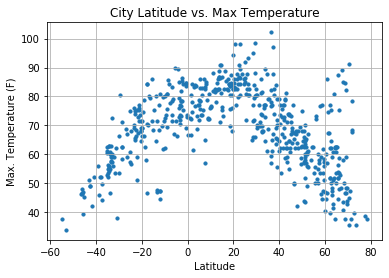

In [28]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("max_temp_lat.png")

# Show plot
plt.show()

# This plot is analyzing the relationship between latitude and max temperature,
# showing that temperature peaks where latitude is at or near zero (the equator).

## Latitude vs. Humidity Plot

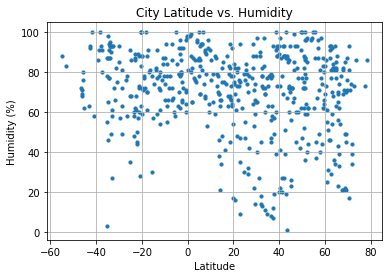

In [29]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("humidity_lat.png")

# Show plot
plt.show()

# This plot shows the relationship between latitude and humidity,
# revealing that humidity is above 60 for the majority of the cities
# but dips somewhat closer to the positive and negative extremes of latitude.

## Latitude vs. Cloudiness Plot

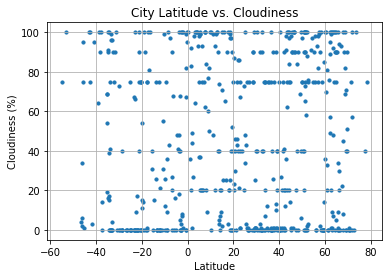

In [50]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cloudiness_vs_lat.png")

# Show plot
plt.show()

# This plot shows the relationship between latitude and cloudiness,
# which doesn't have a clear correlation other than
# the amount of cloudiness is spread throughout all latitudes.

## Latitude vs. Wind Speed Plot

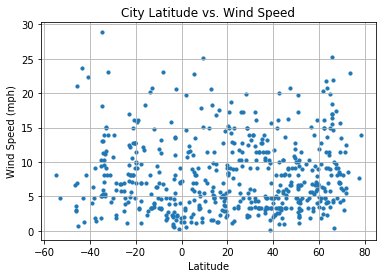

In [51]:
# Build a scatter plot for each data type
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("winds_lat.png")

# Show plot
plt.show()

# This plot shows the relationship between latitude and wind speed,
# which implies that the majority of wind speeds exist along most latitudes
# and concentrate at 15 mph and lower.

## Linear Regression

In [32]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearRegression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(6, 0),fontsize=15,color="red")

    print(f"rvalue    = {round(rvalue, 3)}")
    print(f"r-squared = {round(rvalue**2, 3)}")
    

In [33]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_df[weather_df['Lat']>0]
south_hem = weather_df[weather_df['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = -0.679
r-squared = 0.461


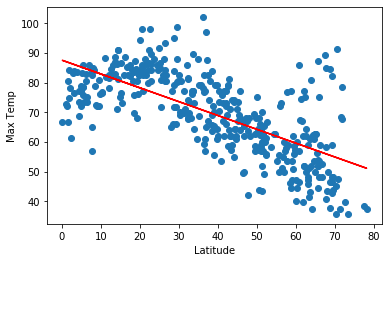

In [42]:
linearRegression(north_hem['Lat'],north_hem['Max Temp'],)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("north_maxtemp_lat.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

rvalue    = 0.759
r-squared = 0.577


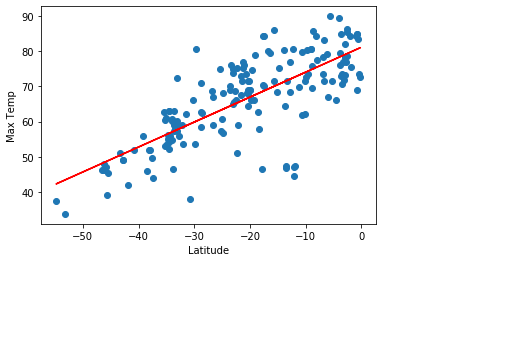

In [43]:
linearRegression(south_hem['Lat'],south_hem['Max Temp'],)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("south_lat_maxtemp.png")

plt.show()


In [ ]:
# R-values decently strong negative correlation of Max Temp and Latitude in Northern Hemisphere
# and even stronger positive correlation between Max Temp and Latitude in Southern Hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue    = -0.111
r-squared = 0.012


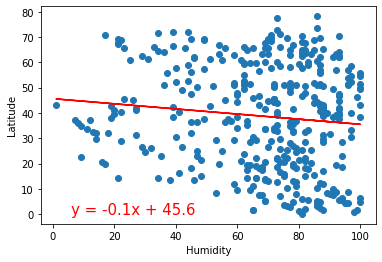

In [44]:
linearRegression(north_hem['Humidity'],north_hem['Lat'],)
plt.xlabel('Humidity')
plt.ylabel('Latitude')

plt.savefig("north_humid_lat.png")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

rvalue    = 0.003
r-squared = 0.0


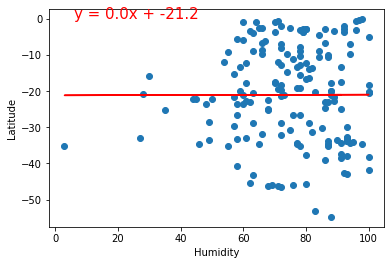

In [45]:
linearRegression(south_hem['Humidity'],south_hem['Lat'],)
plt.xlabel('Humidity')
plt.ylabel('Latitude')

plt.savefig("south_humid_lat.png")

plt.show()


In [ ]:
# R-values show tiny negative correlation between Humidity and Latitude in Northern Hemisphere
# but almost no correlation between Humditity and Latitude in Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = -0.026
r-squared = 0.001


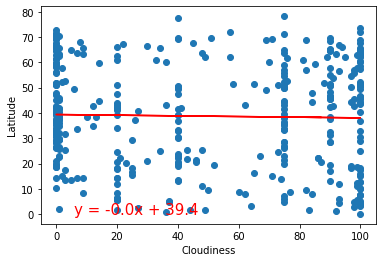

In [46]:
linearRegression(north_hem['Cloudiness'],north_hem['Lat'],)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

plt.savefig("north_cloud_lat.png")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

rvalue    = -0.102
r-squared = 0.011


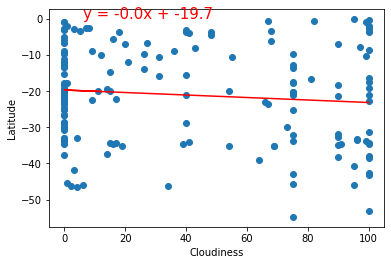

In [47]:
linearRegression(south_hem['Cloudiness'],south_hem['Lat'],)
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

plt.savefig("south_cloud_lat.png")

plt.show()

In [ ]:
# Small r-values show little correlation between Cloudiness and Latitude in both hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = 0.085
r-squared = 0.007


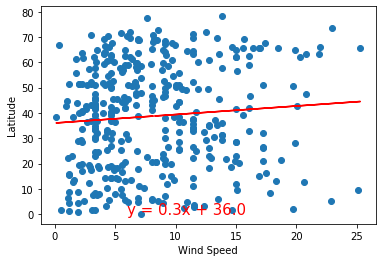

In [48]:
linearRegression(north_hem['Wind Speed'],north_hem['Lat'],)
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

plt.savefig("north_winds_lat.png")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

rvalue    = -0.168
r-squared = 0.028


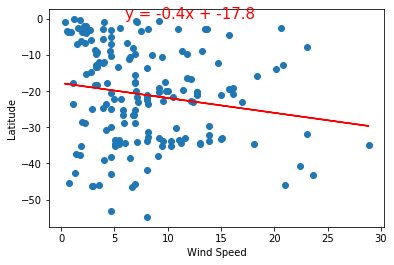

In [49]:
linearRegression(south_hem['Wind Speed'],south_hem['Lat'],)
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

plt.savefig("south_winds_lat.png")

plt.show()


In [ ]:
# R-values show little correlation between Wind Speed and Latitude in the Northern Hemisphere
# but a small amount of negative correlation in the Southern Hemisphere 